In [21]:
import pandas as pd
import numpy as np
from PIL import Image
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch
import os
import cv2

In [ ]:
# Load pretrained model + processor
processor = AutoImageProcessor.from_pretrained("trpakov/vit-face-expression")
face_model = AutoModelForImageClassification.from_pretrained("trpakov/vit-face-expression")

Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [26]:
# Create the database
PATH = "./data/fer2013/test/"
limit = 100
emotions = [e for e in os.listdir(PATH)]
rows=[]

for emotion in emotions:
    current_path = PATH + emotion
    for (i,file) in enumerate(os.listdir(current_path)):
        file_path = current_path + "/" + file
        img = cv2.imread(file_path)
        if i == limit:
            break
        rows.append({"image":img, "emotion":emotion})

df = pd.DataFrame(rows)
# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
        

In [27]:
df["image"][0].shape

(48, 48, 3)

True Emotion: fear
Predictions:
  angry: 0.79%
  disgust: 1.06%
  fear: 92.62%
  happy: 0.79%
  neutral: 1.32%
  sad: 2.56%
  surprise: 0.86%


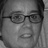

In [ ]:
from IPython.display import display
import torch
import cv2
from PIL import Image
import random

def show_image_and_prediction(index):
    image = df["image"][index]
    emotion = df["emotion"][index]

    # Convert to PIL (OpenCV loads BGR)
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Preprocess
    inputs = processor(images=image_pil, return_tensors="pt")

    # Inference
    with torch.no_grad():
        logits = face_model(**inputs).logits
        probs = torch.nn.functional.softmax(logits, dim=-1)[0]

    # Print true label
    print(f"True Emotion: {emotion}")
    print("Predictions:")

    # Print each class with % probability
    for i, p in enumerate(probs):
        label = face_model.config.id2label[i]
        print(f"  {label}: {p.item()*100:.2f}%")

    # Display image
    display(image_pil)

# Example
show_image_and_prediction(random.randint(0, len(df)-1))
